In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, cross_val_predict
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")


from plotnine import ggplot, aes, geom_smooth

In [2]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

In [3]:
# Changing categorigal variables from numbers to objects so that they can be correctly used.
ha['cp'] = ha['cp'].astype(object)
ha['restecg'] = ha['restecg'].astype(object)
ha['sex'] = ha['sex'].astype(object)

In [4]:
# Get rid of columns with mostly NaN values
good_cols = ha.isna().sum() < 100
ha = ha.loc[:,good_cols]


# Drop other NAs
ha = ha.dropna()

In [5]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

## KNN

In [6]:
X = ha.drop(['output'], axis = 1)
y = ha['output']

pipeline = Pipeline(
    [("preprocessing", ct),
     ("KNN", KNeighborsClassifier())]
)

degrees = {'KNN__n_neighbors': list(range(1,31))}

gscv = GridSearchCV(pipeline, degrees, cv = 5, scoring='roc_auc_ovr')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']

reshape_scores = scores.reshape(-1,30)

df = pd.DataFrame(reshape_scores)

print(df[df.max().idxmax()])

0    0.824854
Name: 25, dtype: float64


In [7]:
X = ha.drop(['output', 'trtbps'], axis = 1)
y = ha['output']

pipeline = Pipeline(
    [("preprocessing", ct),
     ("KNN", KNeighborsClassifier())]
)

degrees = {'KNN__n_neighbors': list(range(1,31))}

gscv = GridSearchCV(pipeline, degrees, cv = 5, scoring='roc_auc_ovr')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']

reshape_scores = scores.reshape(-1,30)

df = pd.DataFrame(reshape_scores)

print(df[df.max().idxmax()])

0    0.83116
Name: 19, dtype: float64


In [8]:
X = ha.drop(['output', 'chol', 'trtbps','restecg'], axis = 1)
y = ha['output']

pipeline = Pipeline(
    [("preprocessing", ct),
     ("KNN", KNeighborsClassifier())]
)

degrees = {'KNN__n_neighbors': list(range(1,31))}

gscv = GridSearchCV(pipeline, degrees, cv = 5, scoring='roc_auc_ovr')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']

reshape_scores = scores.reshape(-1,30)

df = pd.DataFrame(reshape_scores)

print(df[df.max().idxmax()])



0    0.849749
Name: 7, dtype: float64


With testing it seems that for the KNN model, the best option is to leave out blood pressure, cholesterol, and electrocardiographic results, howwever, tis is only based on roc_auc scores and it should be noted that it is using 25 neighbors which to me brings a slight concern of underfitting as the sample size is only about 270.

(Some other models were run with age and sex etc., however, the ones reported were the ones that showed improvement.)

## Logistic Regression

In [9]:
X = ha.drop(['output'], axis = 1)
y = ha['output']

pipeline = Pipeline(
    [("preprocessing", ct),
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.5, C = 10))]
)

degrees = {'LR__l1_ratio': list(np.arange(0.1,1, 0.1)), 'LR__C': [0.001, 0.01, 0.1, 1 ,10, 100]}

gscv = GridSearchCV(pipeline, degrees, cv = 5, scoring='roc_auc_ovr')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']

reshape_scores = scores.reshape(-1,9)

df = pd.DataFrame(reshape_scores)

print(df.max().idxmax())
print(df[df.max().idxmax()].idxmax())

print(df.iloc[df[df.max().idxmax()].idxmax(), df.max().idxmax()])

8
3
0.8678606542882406


In [10]:
X = ha.drop(['output', 'trtbps'], axis = 1)
y = ha['output']

pipeline = Pipeline(
    [("preprocessing", ct),
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.5, C = 10))]
)

degrees = {'LR__l1_ratio': list(np.arange(0.1,1, 0.1)), 'LR__C': [0.001, 0.01, 0.1, 1 ,10, 100]}

gscv = GridSearchCV(pipeline, degrees, cv = 5, scoring='roc_auc_ovr')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']

reshape_scores = scores.reshape(-1,9)

df = pd.DataFrame(reshape_scores)

print(df.max().idxmax())
print(df[df.max().idxmax()].idxmax())

print(df.iloc[df[df.max().idxmax()].idxmax(), df.max().idxmax()])

7
3
0.8612908930150309


In [11]:
X = ha.drop(['output', 'chol', 'trtbps','restecg'], axis = 1)
y = ha['output']

pipeline = Pipeline(
    [("preprocessing", ct),
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.5, C = 10))]
)

degrees = {'LR__l1_ratio': list(np.arange(0.1,1, 0.1)), 'LR__C': [0.001, 0.01, 0.1, 1 ,10, 100]}

gscv = GridSearchCV(pipeline, degrees, cv = 5, scoring='roc_auc_ovr')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']

reshape_scores = scores.reshape(-1,9)

df = pd.DataFrame(reshape_scores)

print(df.max().idxmax())
print(df[df.max().idxmax()].idxmax())

print(df.iloc[df[df.max().idxmax()].idxmax(), df.max().idxmax()])

5
4
0.8615879752431475


In [12]:
X = ha.drop(['output', 'age', 'restecg'], axis = 1)
y = ha['output']

pipeline = Pipeline(
    [("preprocessing", ct),
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.5, C = 10))]
)

degrees = {'LR__l1_ratio': list(np.arange(0.1,1, 0.1)), 'LR__C': [0.001, 0.01, 0.1, 1 ,10, 100]}

gscv = GridSearchCV(pipeline, degrees, cv = 5, scoring='roc_auc_ovr')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']

reshape_scores = scores.reshape(-1,9)

df = pd.DataFrame(reshape_scores)

print(df.max().idxmax())
print(df[df.max().idxmax()].idxmax())

print(df.iloc[df[df.max().idxmax()].idxmax(), df.max().idxmax()])

7
3
0.8745832007073387


This time, age and electrocardiographic results were omitted for the best model that has an l1_ratio of 0.8 and alpha of 1. this is also higher than the KNN model.

## DecisionTree

In [13]:
X = ha.drop(['output'], axis = 1)
y = ha['output']

pipeline = Pipeline(
    [("preprocessing", ct),
     ("DT", DecisionTreeClassifier(max_depth = 10))]
)

degrees = {'DT__max_depth': list(range(0, 20))}

gscv = GridSearchCV(pipeline, degrees, cv = 5, scoring='roc_auc_ovr')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']

reshape_scores = scores.reshape(-1,20)

df = pd.DataFrame(reshape_scores)

print(df[df.max().idxmax()])

0    0.773237
Name: 3, dtype: float64


In [14]:
X = ha.drop(['output', 'sex'], axis = 1)
y = ha['output']

pipeline = Pipeline(
    [("preprocessing", ct),
     ("DT", DecisionTreeClassifier(max_depth = 10))]
)

degrees = {'DT__max_depth': list(range(0, 20))}

gscv = GridSearchCV(pipeline, degrees, cv = 5, scoring='roc_auc_ovr')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']

reshape_scores = scores.reshape(-1,20)

df = pd.DataFrame(reshape_scores)

print(df[df.max().idxmax()])

0    0.784416
Name: 2, dtype: float64


In [15]:
X = ha.drop(['output', 'sex','trtbps', 'chol'], axis = 1)
y = ha['output']


pipeline = Pipeline(
    [("preprocessing", ct),
     ("DT", DecisionTreeClassifier())]
)

degrees = {'DT__max_depth': list(range(0, 20))}

gscv = GridSearchCV(pipeline, degrees, cv = 5, scoring='roc_auc_ovr')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']

reshape_scores = scores.reshape(-1,20)

df = pd.DataFrame(reshape_scores)

print(df[df.max().idxmax()])

fitted = pipeline.fit(X,y)

predict = fitted.predict_proba(X)[:,1]

fpr, tpr, thresholds = roc_curve(y, predict, pos_label=1)

df2 = pd.DataFrame({"true":tpr, "false":fpr})

0    0.79876
Name: 2, dtype: float64


For the decisionstree, the best predictor seems to be a model where sex, blood pressure and cholesterol is left out with a 3 branch deep model.

## Best Model

In [16]:
X = ha.drop(['output', 'age', 'restecg'], axis = 1)
y = ha['output']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify = y)

pipeline = Pipeline(
    [("preprocessing", ct),
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.5, C = 1))]
)

fitted = pipeline.fit(X_train ,y_train)

predict = fitted.predict(X_test)

classes = ['no risk', 'at risk']

cm = confusion_matrix(y_test, predict)

# Convert to a DataFrame
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Print the DataFrame
print(cm_df)

coef = fitted['LR'].coef_

coef_name = pipeline['preprocessing'].get_feature_names_out()

# From Chat GPT to get rid of scientific notations
pd.set_option('display.float_format', lambda x: '%.5f' % x)

df_coef = pd.DataFrame({'Name':coef_name, 'coef':coef[0]})
print(df_coef)

predict = fitted.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, predict, pos_label=1)

df1 = pd.DataFrame({"true":tpr, "false":fpr})

         no risk  at risk
no risk       23        9
at risk       10       27
                   Name     coef
0        dummify__sex_0  1.06924
1        dummify__sex_1 -0.89032
2         dummify__cp_0 -1.57390
3         dummify__cp_1  0.81957
4         dummify__cp_2  0.11484
5         dummify__cp_3  0.00000
6   standardize__trtbps -0.30086
7     standardize__chol -0.21458
8  standardize__thalach  0.99587


Based on the coefficientsit seems that the typical angia and max heart rate are the two most important coefficients to predict heart rate risk.

In [17]:
X = ha.drop(['output', 'chol', 'trtbps','restecg'], axis = 1)
y = ha['output']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify = y)

pipeline = Pipeline(
    [("preprocessing", ct),
     ("KNN", KNeighborsClassifier(n_neighbors = 25))]
)

fitted = pipeline.fit(X_train ,y_train)

predict = fitted.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, predict, pos_label=1)

df2 = pd.DataFrame({"true":tpr, "false":fpr})

In [18]:
X = ha.drop(['output', 'sex','trtbps', 'chol'], axis = 1)
y = ha['output']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify = y)

pipeline = Pipeline(
    [("preprocessing", ct),
     ("DT", DecisionTreeClassifier(max_depth = 3))]
)

fitted = pipeline.fit(X_train ,y_train)

predict = fitted.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, predict, pos_label=1)

df3 = pd.DataFrame({"true":tpr, "false":fpr})

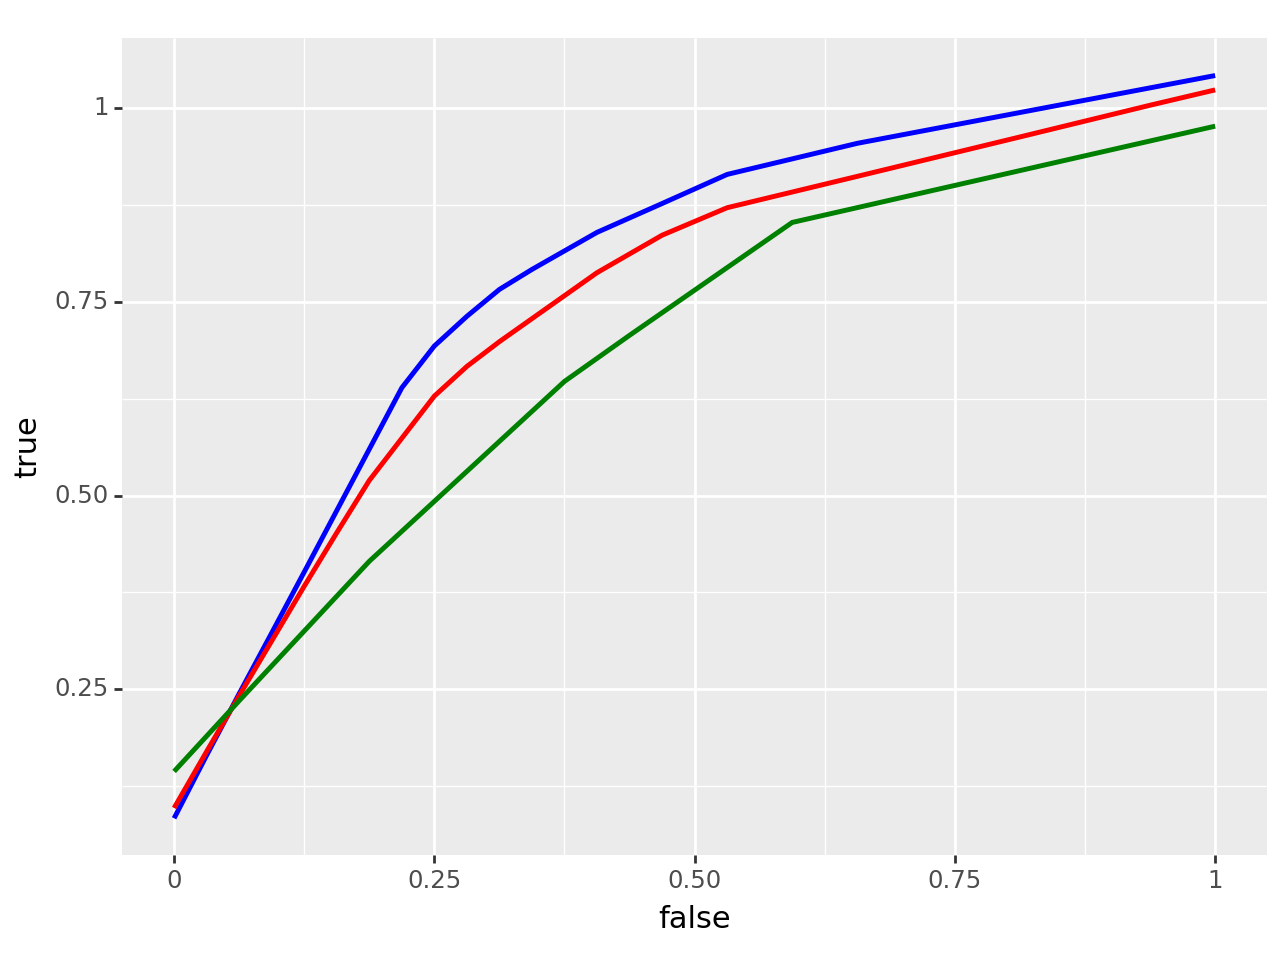

<Figure Size: (640 x 480)>

In [19]:

(ggplot()
    + geom_smooth(aes( x = 'false', y='true'),data = df1, color = 'blue')
    + geom_smooth(aes( x = 'false', y='true'),data = df2, color = 'red')
    + geom_smooth(aes( x = 'false', y='true'),data = df3, color = 'green')
)

To reduce mistakes and since I didn't build my models to have unique names, I'm running the models again below.

# Part 2

In [20]:
X = ha.drop(['output', 'chol', 'trtbps','restecg'], axis = 1)
y = ha['output']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify = y)

pipeline = Pipeline(
    [("preprocessing", ct),
     ("KNN", KNeighborsClassifier(n_neighbors = 25))]
)

recall = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall_weighted')

print(f"Recall: {recall.mean()}")

precision = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='precision_weighted')

print(f"Precision: {precision.mean()}")

y_pred = cross_val_predict(pipeline, X_train, y_train, cv=5)

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

specificity = tn / (tn + fp)

print(f"Specificity: {specificity}")

Recall: 0.774390243902439
Precision: 0.778021939549539


Specificity: 0.8


In [21]:
X = ha.drop(['output', 'age', 'restecg'], axis = 1)
y = ha['output']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify = y)

pipeline = Pipeline(
    [("preprocessing", ct),
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.5, C = 1))]
)

recall = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall_weighted')

print(f"Recall: {recall.mean()}")

precision = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='precision_weighted')

print(f"Precision: {precision.mean()}")

y_pred = cross_val_predict(pipeline, X_train, y_train, cv=5)

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

specificity = tn / (tn + fp)

print(f"Specificity: {specificity}")

Recall: 0.7798780487804878
Precision: 0.7866971625371015


Specificity: 0.7263157894736842


In [22]:
X = ha.drop(['output', 'sex','trtbps', 'chol'], axis = 1)
y = ha['output']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify = y)

pipeline = Pipeline(
    [("preprocessing", ct),
     ("DT", DecisionTreeClassifier(max_depth = 3))]
)

recall = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall_weighted')

print(f"Recall: {recall.mean()}")

precision = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='precision_weighted')

print(f"Precision: {precision.mean()}")

y_pred = cross_val_predict(pipeline, X_train, y_train, cv=5)

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

specificity = tn / (tn + fp)

print(f"Specificity: {specificity}")

Recall: 0.7496341463414634


Precision: 0.7513934629091201


Specificity: 0.7368421052631579


The values are shown as a decimal/percentage. What we can see is that our "best" model based on the roc auc also seems to have the highest proportions in these percentages, which makes sense if it is the best at predicting, it should get the most correct matches.

Q1: for this purpose we would want recall to be as high as possible as this means that we are correctly identifying actual high risk patients. Recommendation is Logistic Regression with a score of 79.5%

Q2: For this purpose we want precision as high as possible as we want to make sure that the people who actually need the beds get them which means that we want to be as sure as possible that the the patients are correctly identified. Recommendation is Logistic Regression with a score of 80%

Q3: Based on my best model, I would argue that the the most important coefficeints should be considered. This would indicate sex and max heart rate during excericise. Chest pain is ignored as it isn't necessarily a biological feature as it is more so a condition. Use Logistic Regression.

Q4: Once again I would argue for logistic regression as it is the model that based on the roc auc score, predicts our data the best. I would choose Logistic Regression. 

In [23]:
ha_validation = pd.read_csv("https://www.dropbox.com/s/jkwqdiyx6o6oad0/heart_attack_validation.csv?dl=1")

ha_validation['cp'] = ha_validation['cp'].astype(object)
ha_validation['restecg'] = ha_validation['restecg'].astype(object)
ha_validation['sex'] = ha_validation['sex'].astype(object)

# Get rid of columns with mostly NaN values
good_cols = ha_validation.isna().sum() < 100
ha_validation = ha_validation.loc[:,good_cols]


# Drop other NAs
ha_validation = ha_validation.dropna()


In [24]:
X = ha.drop(['output', 'chol', 'trtbps','restecg'], axis = 1)
y = ha['output']

X2 = ha_validation.drop(['output', 'chol', 'trtbps','restecg'], axis = 1)
y2 = ha_validation['output']


#X2 = ct.fit_transform(X2)

pipeline = Pipeline(
    [("preprocessing", ct),
     ("KNN", KNeighborsClassifier(n_neighbors = 25))]
)

fitted = pipeline.fit(X ,y)

predict = fitted.predict(X2)

classes = ['no risk', 'at risk']

cm = confusion_matrix(y2, predict)

tn, fp, fn, tp = confusion_matrix(y2, predict).ravel()

# Convert to a DataFrame
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Print the DataFrame
print(cm_df)

roc_auc = roc_auc_score(y, pipeline.predict_proba(X)[:, 1])

print(f"Roc Auc: {roc_auc}")

precision = tp / (tp + fp)

print(f"Precision: {precision}")

recall = tp / (tp + fn)

print(f"Recall: {recall}")


         no risk  at risk
no risk       10        1
at risk        7       12
Roc Auc: 0.855193614496818
Precision: 0.9230769230769231
Recall: 0.631578947368421


In [25]:
X = ha.drop(['output', 'age', 'restecg'], axis = 1)
y = ha['output']

X2 = ha_validation.drop(['output', 'age', 'restecg'], axis = 1)
y2 = ha_validation['output']

pipeline = Pipeline(
    [("preprocessing", ct),
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.5, C = 1))]
)

fitted = pipeline.fit(X ,y)

predict = fitted.predict(X2)

classes = ['no risk', 'at risk']

cm = confusion_matrix(y2, predict)

tn, fp, fn, tp = confusion_matrix(y2, predict).ravel()

# Convert to a DataFrame
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Print the DataFrame
print(cm_df)

roc_auc = roc_auc_score(y, pipeline.predict_proba(X)[:, 1])

print(f"Roc Auc: {roc_auc}")

precision = tp / (tp + fp)

print(f"Precision: {precision}")

recall = tp / (tp + fn)

print(f"Recall: {recall}")

         no risk  at risk
no risk        8        3
at risk        5       14
Roc Auc: 0.8797324991910258
Precision: 0.8235294117647058
Recall: 0.7368421052631579


In [26]:
X = ha.drop(['output', 'age', 'restecg'], axis = 1)
y = ha['output']

X2 = ha_validation.drop(['output', 'age', 'restecg'], axis = 1)
y2 = ha_validation['output']

pipeline = Pipeline(
    [("preprocessing", ct),
     ("DT", DecisionTreeClassifier(max_depth = 3))]
)

fitted = pipeline.fit(X ,y)

predict = fitted.predict(X2)

classes = ['no risk', 'at risk']

cm = confusion_matrix(y2, predict)

tn, fp, fn, tp = confusion_matrix(y2, predict).ravel()

# Convert to a DataFrame
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Print the DataFrame
print(cm_df)

roc_auc = roc_auc_score(y, pipeline.predict_proba(X)[:, 1])

print(f"Roc Auc: {roc_auc}")

precision = tp / (tp + fp)

print(f"Precision: {precision}")

recall = tp / (tp + fn)

print(f"Recall: {recall}")

         no risk  at risk
no risk        9        2
at risk        8       11


Roc Auc: 0.866492287779096
Precision: 0.8461538461538461
Recall: 0.5789473684210527


Interestingly the model seems to perform really well on all instances, however, when ooking at recall, the values dropped a lot which is interesting as that means that we are actually not predicting the actual positives that well. We are very precise meaning that the predictions that are true positivies are actually true positives at a very high rate, however, we fail to find the true positives from the dataset.

# Part 5:

As it was not specified if we are supposed to use the validation data or just split for this part, I chose to use the split data, although the methd is esentially the same.

In [27]:
X = ha.drop(['output', 'chol', 'trtbps','restecg'], axis = 1)
y = ha['output']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify = y)

pipeline = Pipeline(
    [("preprocessing", ct),
     ("KNN", KNeighborsClassifier(n_neighbors = 25))]
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

kappa = cohen_kappa_score(y_test, y_pred)

print(f"Cohen's Kappa: {kappa}")

Cohen's Kappa: 0.4475347661188369


In [28]:
X = ha.drop(['output', 'age', 'restecg'], axis = 1)
y = ha['output']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify = y)

pipeline = Pipeline(
    [("preprocessing", ct),
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.5, C = 1))]
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

kappa = cohen_kappa_score(y_test, y_pred)

print(f"Cohen's Kappa: {kappa}")


Cohen's Kappa: 0.4475347661188369


In [29]:
X = ha.drop(['output', 'age', 'restecg'], axis = 1)
y = ha['output']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify = y)

pipeline = Pipeline(
    [("preprocessing", ct),
     ("DT", DecisionTreeClassifier(max_depth = 3))]
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

kappa = cohen_kappa_score(y_test, y_pred)

print(f"Cohen's Kappa: {kappa}")

Cohen's Kappa: 0.3696013289036545


Cohen's Kappa is a measure that indicates the degree of agreement between two datasets while taking into account the possibility that the agreement is caused by random chance. It is interesting that out of my models the KNN model and logistic regression score the exact same amount, however, since other measures also indicate that logistic regression is our best model, I would still choose it. At 0.448, the value falls under "moderate agreement" this means that the prediction is moderately accurate to the true data, however, it does leave room for the predictions occuring just by chance and especially in medical applications, a moderate agreement might not be a satisfying result. I think this is a good metric in a situation like this as with only two possible results "at risk" or "no risk" and especially in a scenario where the data is split evenly, the data could be deceiving. Imagine if the results are roughly 50-50, then a coin flip could provide us with data that "looks right" and with some luck it could even be realtively close to the truth.